# UE analyse des données environnementales :
Séance 1 : prise en main des données

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
Données accessibles :
- Données simulées passées
- Données simulées futures
- Données observées passées
- Incertitude des données observées passées

Labels correspondants :
- Les noms (labels) des modèles climatiques
- Les dates (labels) passées recouvertes
- Les dates (labels) futures recouvertes


In [3]:
# Importation des données simulées et observées
matrix_1 = np.load('data/matrix_1.npy')
matrix_2 = np.load('data/matrix_2.npy')
matrix_3 = np.load('data/matrix_3.npy')
matrix_4 = np.load('data/matrix_4.npy')

# Importation des labels correspondants
label_models       = np.load('data/label_models.npy')
label_past_times   = np.load('data/label_past_times.npy')
label_future_times = np.load('data/label_future_times.npy')

# Exercice

Parmis les quatre matrices de données, il y a :
- une matrice de données simulant l'anomalie de température passée (data_simulated_past)
- une matrice de données simulant l'anomalie de température future (data_simulated_future)
- une matrice de données mesurant l'anomalie de température passée (data_observed_past)
- une matrice de données d'incertitude (écart type) de l'anomalie mesurée (data_observed_past_sigma)

Retrouvez la correspondance avec les 4 matrices, et complétez ci-dessous.


In [4]:
data_simulated_past      = matrix_3
data_simulated_future    = matrix_1
data_observed_past       = matrix_2
data_observed_past_sigma = matrix_4

# Exercice

Quels sont les noms des différents modèles climatiques ?

In [5]:
label_models


array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CIESM', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CanESM5', 'EC-Earth3', 'FIO-ESM-2-0', 'GFDL-ESM4',
       'GISS-E2-1-G', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G',
       'KIOST-ESM', 'MCM-UA-1-0', 'MIROC6', 'MRI-ESM2-0', 'NESM3',
       'TaiESM1', 'UKESM1-0-LL'], dtype='<U13')

# Exercice

Quel est l'interval de temps passé simulé et observé ?

Quel est l'interval de temps futur simulé ?

In [6]:
label_past_times,label_future_times

(array(['1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857',
        '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865',
        '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873',
        '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881',
        '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889',
        '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897',
        '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905',
        '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
        '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
        '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
        '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
        '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
        '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
        '1954', '1955', '1956', '1957', '1958', '1959', '1960', 

# Exercice

Affichez l'évolution de l'anomalie de température, pour les différents modèles climatiques, et pour les observations. Les simulations sont-elles cohérentes avec les observations ?


Affichez la série temporelle moyenne multi-modèle et son incertitude à un écart type (aide : fonction fill_between de matplotlib).

Affichez la série temporelle observée et son incertitude à un écart type (aide : fonction fill_between de matplotlib).



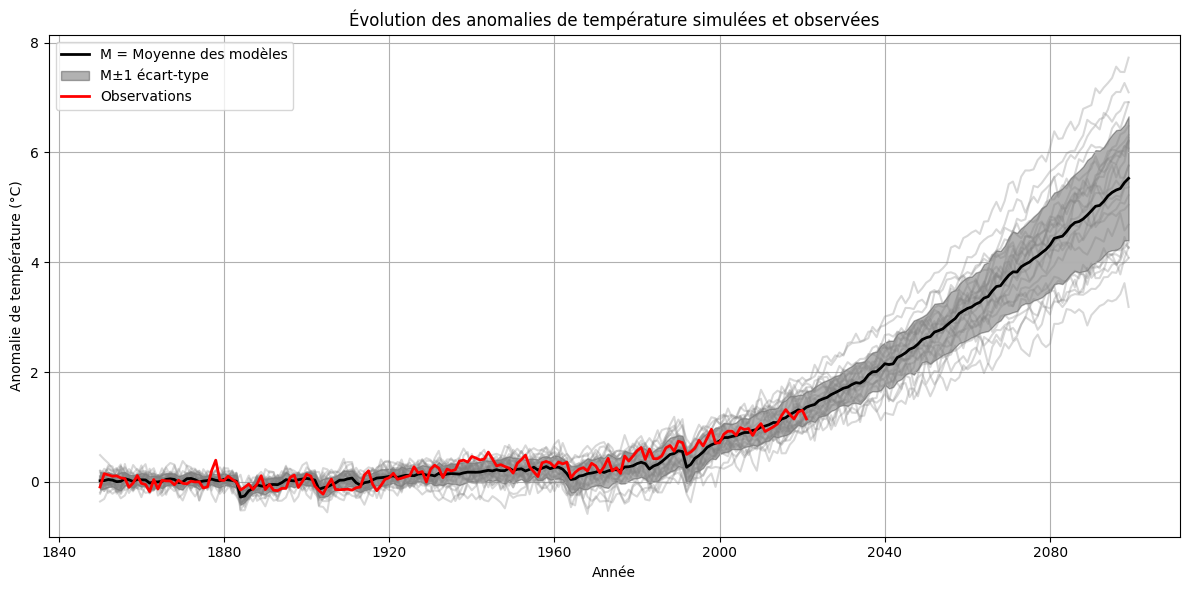

In [60]:
# Concaténation des temps
label_all_times = np.concatenate((label_past_times, label_future_times))

# Concaténation des anomalies simulées
data_all_models = np.concatenate((matrix_3, matrix_1), axis=1)  # (25, 250)
# Moyenne et écart-type des modèles (par année)
mean_model = data_all_models.mean(axis=0)
std_model = data_all_models.std(axis=0)

# Tracé des simulations(1850,2099), moyenne des simulations et ecarts types, et observations passées
plt.figure(figsize=(12, 6))

# Courbes des modèles individuels (gris clair)
for i in range(data_all_models.shape[0]):
    plt.plot(label_all_times, data_all_models[i], color='gray', alpha=0.3)

# Moyenne des modèles
plt.plot(label_all_times, mean_model, color='black', linewidth=2, label='M = Moyenne des modèles')

# Bande d'incertitude (±1 écart-type autour de la moyenne)
plt.fill_between(label_all_times,
                 mean_model - std_model,
                 mean_model + std_model,
                 color='black',
                 alpha=0.3,
                 label='M±1 écart-type')


# Observations
plt.plot(label_past_times, matrix_2.flatten(), color='red', linewidth=2, label='Observations')

plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.title('Évolution des anomalies de température simulées et observées')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Les simulations suivent la même tendance que les observations, les observations et la moyenne des modèles se juxtaposent sur beaucoup de points, les observations restent comprises globalement dans le rayon d'incertitude des modèles, on peut dire que les simulations sont cohérentes avec les observations

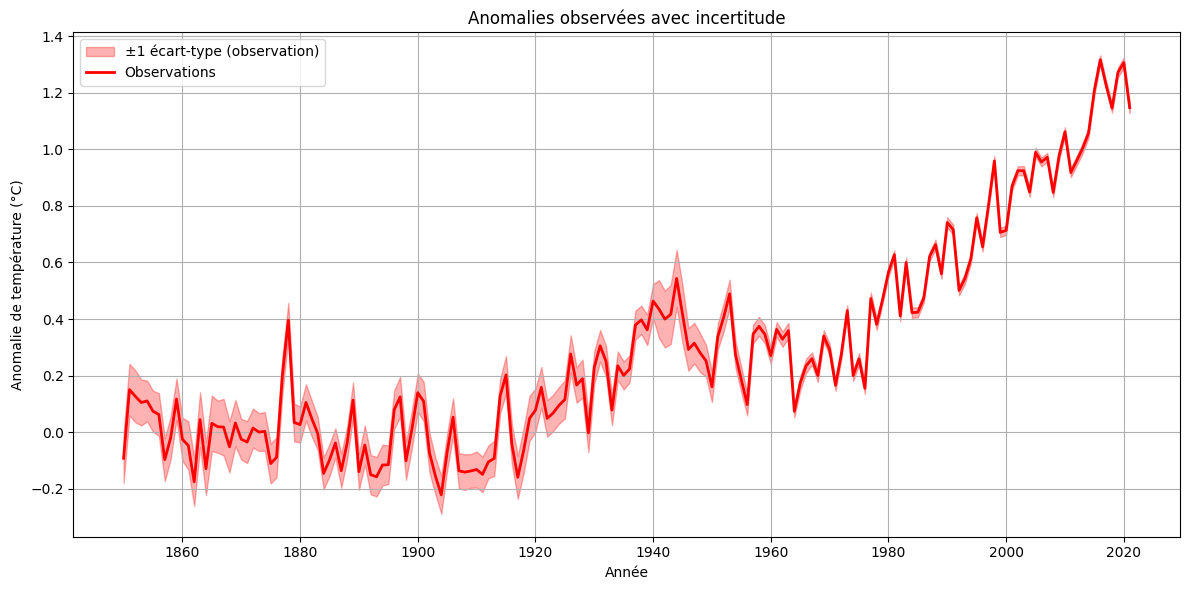

In [58]:
observed_mean = matrix_2.flatten()
observed_sigma = matrix_4  # shape (172,)

# Tracé des observations passées et leur ecarts type
plt.figure(figsize=(12, 6))

# Bande d'incertitude (±1 sigma)
plt.fill_between(label_past_times,
                 observed_mean - observed_sigma,
                 observed_mean + observed_sigma,
                 color='red',
                 alpha=0.3,
                 label='±1 écart-type (observation)')

# Courbe des observations
plt.plot(label_past_times, observed_mean, color='red', linewidth=2, label='Observations')

plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.title("Anomalies observées avec incertitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Exercice
Si on fait l'hypothèse que la distribution des données simulées suit une loi gaussienne, donnez les intervalles d'anomalie de température prédits en 2099 à 68%, 95% et 99%.

In [61]:
# Extraire l'année 2099 (dernière colonne de matrix_1)
simulations_2099 = matrix_1[:, -1]  # shape: (25,)

# Calcul des paramètres
mean_2099 = np.mean(simulations_2099)
std_2099 = np.std(simulations_2099)

# Intervalles de confiance
interval_68 = (mean_2099 - std_2099, mean_2099 + std_2099)
interval_95 = (mean_2099 - 2 * std_2099, mean_2099 + 2 * std_2099)
interval_99 = (mean_2099 - 3 * std_2099, mean_2099 + 3 * std_2099)

print(f"2099 — Intervalle à 68% : [{interval_68[0]:.3f}, {interval_68[1]:.3f}] °C")
print(f"2099 — Intervalle à 95% : [{interval_95[0]:.3f}, {interval_95[1]:.3f}] °C")
print(f"2099 — Intervalle à 99% : [{interval_99[0]:.3f}, {interval_99[1]:.3f}] °C")



2099 — Intervalle à 68% : [4.399, 6.656] °C
2099 — Intervalle à 95% : [3.271, 7.784] °C
2099 — Intervalle à 99% : [2.143, 8.913] °C


# Exercice
Le dernier exercice supposait que la distribution des données simulées suit une loi gaussienne. Cette hypothèse est-elle vraie ?

In [62]:
# Comptage du nombre de modèles dans chaque intervalle
within_68 = np.sum(np.abs(simulations_2099 - mean_2099) <= std_2099)
within_95 = np.sum(np.abs(simulations_2099 - mean_2099) <= 2 * std_2099)
within_99 = np.sum(np.abs(simulations_2099 - mean_2099) <= 3 * std_2099)

# Pourcentages observés
pct_68 = within_68 / len(simulations_2099) * 100
pct_95 = within_95 / len(simulations_2099) * 100
pct_99 = within_99 / len(simulations_2099) * 100

print(f"Pourcentage de modèles dans [μ ± σ] (68%)  : {pct_68:.1f} %")
print(f"Pourcentage de modèles dans [μ ± 2σ] (95%) : {pct_95:.1f} %")
print(f"Pourcentage de modèles dans [μ ± 3σ] (99%) : {pct_99:.1f} %")


Pourcentage de modèles dans [μ ± σ] (68%)  : 56.0 %
Pourcentage de modèles dans [μ ± 2σ] (95%) : 96.0 %
Pourcentage de modèles dans [μ ± 3σ] (99%) : 100.0 %


L’intervalle à ±1σ couvre 56 % des données au lieu des 68 % attendus, tandis que les intervalles à ±2σ et ±3σ sont conformes aux attentes.
Cela suggère que l’hypothèse de normalité est globalement raisonnable, bien que la distribution soit probablement un peu aplatie ou asymétrique.

# Exercice
Ces simulations correspondent toutes à un scénario SSP précis. Qu'est ce qu'un scénario SSP ? Pouvez vous trouver auquel ces simulations appartiennent ?

Les scénarios SSP (Shared Socio-economic Pathways) sont des narratifs, traduits en ensembles d'hypothèses socio-économiques (Population, Éducation, Urbanisation, PIB). Ces narratifs décrivent des évolutions alternatives de la société future en l'absence de changement climatique ou de politique climatique.[Réf: carbone4].
En comparant la projection moyenne des anomalies de température simulées jusqu'en 2099 avec les trajectoires des différents scénarios SSP disponibles (notamment via le site Carbone 4), on constate que les valeurs simulées sont les plus proches du scénario SSP5-8.5, qui correspond à un monde fortement dépendant des énergies fossiles, sans politique climatique restrictive.
Par exemple, le SSP3-7.0 montre une anomalie en 2100 typiquement comprise entre 3°C et 5°C, tandis que dans nos simulations, les anomalies atteignent environ 4.2°C à 6.2°C en 2099. Ce niveau dépasse celui du SSP3-7.0, ce qui suggère que les simulations correspondent à un scénario plus extrême — en l'occurrence, SSP5-8.5, le plus pessimiste en termes d’émissions et de réchauffement projeté.

# Exercice : transformation du problème en univarié
Transformez le problème en univarié : on veut prédire l'anomalie moyenne entre 2090 et 2099, à partir de l'anomalie moyenne entre 1850 et 1900.

Construisez X_simu, Y_simu, et X_obs à partir des données, avec :
- X_simu (données simulées passées) de taille (M, 1) avec M modèles climatiques
- Y_simu (données simulées futures) de taille (M, 1)
- X_obs (données observées passées) de taille (1, 1)

Astuce : les type des listes label_past_times et label_future_times sont des datetime64[Y] numpy.

In [64]:
X_date_min = 1850
X_date_max = 1900

Y_date_min = 2090
Y_date_max = 2099

# Sélection des indices pour X (période passée)
idx_X = np.where((label_past_times >= np.datetime64(str(X_date_min))) &
                 (label_past_times <= np.datetime64(str(X_date_max))))[0]

# Sélection des indices pour Y (période future)
idx_Y = np.where((label_future_times >= np.datetime64(str(Y_date_min))) &
                 (label_future_times <= np.datetime64(str(Y_date_max))))[0]

In [66]:
X_simu = matrix_3[:, idx_X].mean(axis=1, keepdims=True)  # shape (25, 1)
Y_simu = matrix_1[:, idx_Y].mean(axis=1, keepdims=True)  # shape (25, 1)
X_obs = np.array([[matrix_2[0, idx_X].mean()]]) # shape (1, 1)

In [81]:
#On estime la valeur moyenne de l'anomalie entre 2090 et 2099 grace à une regression linéaire 
# Étape 1 : Ajustement du modèle linéaire (Y = aX + b)
# On résout : Y_simu ≈ a * X_simu + b

# On ajoute l'intercept
X_design = np.hstack([X_simu, np.ones_like(X_simu)])  # shape (25, 2)

# Estimation des coefficients [a, b] par moindres carrés
theta_hat = np.linalg.lstsq(X_design, Y_simu, rcond=None)[0]
a, b = theta_hat.flatten()

# Étape 2 : Prédiction de Y_obs à partir de X_obs
X_obs_design = np.hstack([X_obs, [[1]]])  # shape (1, 2)
Y_obs_hat = X_obs_design @ theta_hat      # shape (1, 1)

print(f"Modèle appris : Y ≈ {a:.3f} * X + {b:.3f}")
print(f"Prédiction de l’anomalie moyenne 2090–2099 à partir des observations : {Y_obs_hat[0,0]:.3f} °C")

Modèle appris : Y ≈ 0.658 * X + 5.017
Prédiction de l’anomalie moyenne 2090–2099 à partir des observations : 5.298 °C


# Question bonus :
La moyenne multi modèle n'utilise que Y_simu. Son incertitude peut être calculée de facon empirique à partir de l'écart type de Y_simu. Que vaut cet écart type ?

Comment utiliser aussi X_simu ou encore X_obs pour diminuer l'incertitude ? Proposez différentes pistes et/ou testez les.


In [79]:
# Écart-type empirique des moyennes des modèles (anomalie 2090–2099)
std_Y_simu = np.std(Y_simu)
print(f"Écart-type empirique de Y_simu : {std_Y_simu:.3f} °C")

Écart-type empirique de Y_simu : 1.036 °C


### Méthode 1 : Régression linéaire (déjà faite)

On ajuste une droite sur l'ensemble des couples (`X_simu`, `Y_simu`) pour modéliser la relation entre anomalies passées et futures. On utilise ensuite `X_obs` comme entrée pour prédire une anomalie future `Y_obs_hat`.

### Méthode 2 : Régression sur modèles proches de l'observation

On filtre les modèles dont l'anomalie passée est proche de l'observation (`X_simu ≈ X_obs`) avec un seuil ε. On ajuste ensuite une régression linéaire uniquement sur ces modèles sélectionnés. Cela permet de concentrer la prédiction sur les modèles jugés les plus réalistes selon leur performance passée.

### Méthode 3 : Moyenne pondérée des modèles selon leur proximité à l'observation

Plutôt que de sélectionner ou rejeter des modèles (comme en méthode 2), on attribue à chaque modèle un poids en fonction de sa proximité à `X_obs`. Les poids sont donnés par une fonction exponentielle décroissante :

$$
w_i = \exp\left( -\frac{(X_i - X_{\text{obs}})^2}{2\sigma^2} \right)
$$

où `σ` contrôle la sensibilité à l’écart. On calcule ensuite la moyenne et l’écart-type de `Y_simu` de manière pondérée.

Cette méthode permet de conserver l’ensemble des modèles tout en réduisant l’influence de ceux qui s’éloignent trop de l’observation. Elle offre une alternative souple entre l’approche brute (moyenne non pondérée) et la sélection stricte par seuil.


In [80]:
# Méthode 3 : Moyenne pondérée des modèles selon leur proximité à X_obs

# Paramètre de sensibilité (plus petit → plus exigeant)
sigma = 0.02

# Calcul des poids pour chaque modèle
distances = (X_simu.flatten() - X_obs.flatten())**2
weights = np.exp(-distances / (2 * sigma**2))
weights /= np.sum(weights)  # normalisation pour que la somme = 1

# Moyenne et écart-type pondérés
Y_weighted_mean = np.sum(weights * Y_simu.flatten())
Y_weighted_std = np.sqrt(np.sum(weights * (Y_simu.flatten() - Y_weighted_mean)**2))

print("Méthode 3 : Moyenne pondérée")
print(f"→ Moyenne pondérée de Y_simu : {Y_weighted_mean:.3f} °C")
print(f"→ Écart-type pondéré : {Y_weighted_std:.3f} °C")


Méthode 3 : Moyenne pondérée
→ Moyenne pondérée de Y_simu : 5.215 °C
→ Écart-type pondéré : 0.840 °C


En prenant σ = 0.01, seuls les modèles extrêmement proches de l'observation passée sont significativement pondérés. Cela conduit à une moyenne pondérée très localisée (4.947 °C) et une incertitude fortement réduite (écart-type de 0.063 °C). L’estimation de l’anomalie future dépend fortement de l’approche choisie.Avec σ = 0.02, la moyenne pondérée (5.215 °C) est très proche de la moyenne brute (5.221 °C), mais l’écart-type est réduit (0.840 °C contre 1.036 °C). Cela montre que la méthode 3 permet d’atténuer l’influence des modèles les plus éloignés de l’observation, même sans filtrage strict, et ainsi de réduire l’incertitude sur la projection future.

Pour la méthode 2, on fera pas d'exemple d'application puisque l'intervalle de temps étant déja assez court et sans avoir de règle précise pour le choix d'epsilon, le filtrage donnera encore moins de données pour estimer les parametres de la regression. De plus, la méthode 3 généralise la méthode 2 sans pour autant négliger certaines simulations mais juste en leur donnant un poids faible.